In [1]:
from pyspark.sql import SparkSession
import findspark
findspark.init('C:\spark-3.0.2-bin-hadoop2.7')

In [2]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import isnan
from pyspark.ml.classification import (LogisticRegression,DecisionTreeClassifier, 
                                       RandomForestClassifier)
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.types import IntegerType, StringType,DoubleType
from pyspark.sql.functions import *

In [3]:
spark=SparkSession.builder.master("local[2]").appName("ops").getOrCreate()
spark

In [4]:
data=spark.read.csv(r"D:\\BIGDATA\\credit.csv",inferSchema=True,header=True,sep= ",")
data.show(8)
data.printSchema()
data.count()

+----+------------+------------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------+-----+
|Time|          V1|          V2|         V3|          V4|          V5|          V6|          V7|          V8|          V9|         V10|         V11|         V12|         V13|         V14|         V15|         V16|         V17|         V18|         V19|         V20|         V21|         V22|         V23|         V24|         V25|         V26|         V27|         V28|Amount|Class|
+----+------------+------------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+--------

20244

In [5]:
data=data.dropDuplicates()
data.count()

20181

In [6]:
data=data.na.drop()
data.count()

20181

In [7]:
data.select([count(when(isnull(c) | isnan(c) , c)).alias(c) for c in data.columns]).show()
data.count()

+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+------+-----+
|Time| V1| V2| V3| V4| V5| V6| V7| V8| V9|V10|V11|V12|V13|V14|V15|V16|V17|V18|V19|V20|V21|V22|V23|V24|V25|V26|V27|V28|Amount|Class|
+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+------+-----+
|   0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|  0|     0|    0|
+----+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+------+-----+



20181

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('D:\BIGDATA/credit.csv', header=0)

In [3]:
# split train and test data
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [4]:
#logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

C:\Users\JAVERI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [5]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5485   18]
 [ 549   22]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      5503
           1       0.55      0.04      0.07       571

    accuracy                           0.91      6074
   macro avg       0.73      0.52      0.51      6074
weighted avg       0.88      0.91      0.87      6074



In [12]:
print('Accuracy of svm classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of svm classifier on test set: 0.91


In [13]:
#Naive Bayes Theorem
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [14]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
#model evaluation
accuracy = accuracy_score(y_test,y_pred)*100
accuracy

87.84985182746131

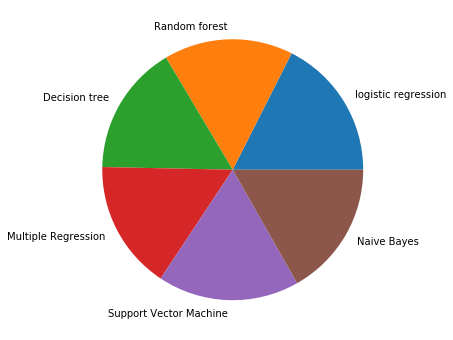

In [8]:
import matplotlib.pyplot as plt
x=[0.91,0.83,0.836,0.83,0.91,0.87]
fig = plt.figure(figsize=(6,6))
plt.pie(x,labels=('logistic regression','Random forest','Decision tree','Multiple Regression','Support Vector Machine','Naive Bayes'))
plt.show()